<a href="https://colab.research.google.com/github/almahramic/humans-or-horses/blob/main/Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed,my drive appearing on the left hand side

Mounted at /content/drive


In [3]:
# i well Define paths to the dataset
train_dir = '/content/drive/MyDrive/horse-or-human/train'  # here i well Update with myvactual path
test_dir = '/content/drive/MyDrive/horse-or-human/test'    # Update with my actual path

In [4]:
import os
print(len(os.listdir('/content/drive/MyDrive/horse-or-human/train/horses')))
print(len(os.listdir('/content/drive/MyDrive/horse-or-human/train/humans')))
print(len(os.listdir('/content/drive/MyDrive/horse-or-human/test/horses')))
print(len(os.listdir('/content/drive/MyDrive/horse-or-human/test/humans')))

500
527
128
128


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#  i well Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for test
)

# i well Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (horses or. humans)
    subset='training'  # Specify 'training' for the training set
)

#  i well Create ImageDataGenerator for the test set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same test split as in the training set
)

# Load and prepare test data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'test' for the test set
)

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [7]:
#  here i well create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) # create the feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  # get the output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) # for the binary_crossentropy - binary classification

In [9]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 208s 7s/step - accuracy: 0.5695 - loss: 1.0310 - val_accuracy: 0.8927 - val_loss: 0.2290
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 192s 5s/step - accuracy: 0.8416 - loss: 0.5233 - val_accuracy: 0.9756 - val_loss: 0.0866
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.9934 - loss: 0.0434 - val_accuracy: 0.8829 - val_loss: 0.3454
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.9904 - loss: 0.0308 - val_accuracy: 0.9561 - val_loss: 0.1327
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.9930 - loss: 0.0411 - val_accuracy: 0.9805 - val_loss: 0.0590
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.9971 - loss: 0.0056 - val_accuracy: 0.9463 - val_loss: 0.1250
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 1.0000 - loss: 7.6813e-04 - val_accuracy: 0.9610 - val_loss: 0.1033
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 1.0000 - loss: 1.4221e-04 - val_accuracy: 0.9415 - val_

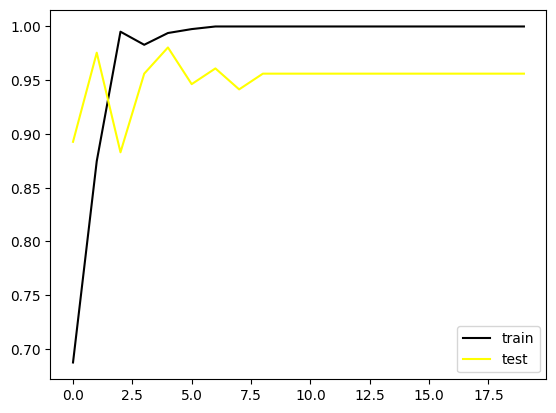

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='black',label='train')
plt.plot(history.history['val_accuracy'],color='yellow',label='test')
plt.legend()
plt.show()

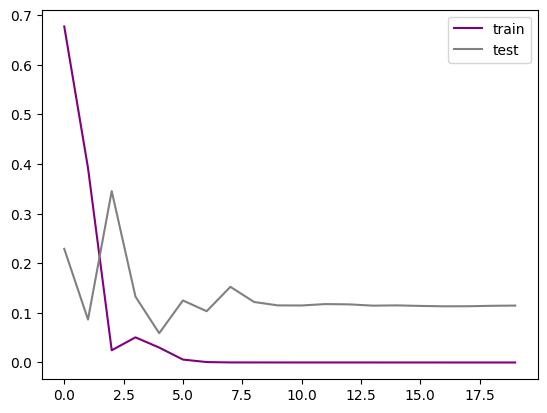

In [11]:
plt.plot(history.history['loss'],color='purple',label='train')
plt.plot(history.history['val_loss'],color='grey',label='test')
plt.legend()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [13]:
# i well predict the test data
predictions = model.predict(test_data)


8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

#  i well Assuming if i have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  #  i well Adjust the threshold as needed

#  then Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

#  and Print the confusion matrix
print("Confusion Matrix:")
print(cm)

#  then also Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[35 93]
 [41 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.27      0.34       128
           1       0.48      0.68      0.56       128

    accuracy                           0.48       256
   macro avg       0.47      0.48      0.45       256
weighted avg       0.47      0.48      0.45       256



In [15]:
#  lets create the CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  #  the bath added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) # this is the feature reduction
model.add(Dropout(0.1))  #  its added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # its added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #this is the output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 208s 8s/step - accuracy: 0.7964 - loss: 2.1757 - val_accuracy: 0.6780 - val_loss: 0.7703
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 263s 8s/step - accuracy: 0.9558 - loss: 0.7141 - val_accuracy: 0.6390 - val_loss: 1.6104
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 214s 8s/step - accuracy: 0.9872 - loss: 0.1213 - val_accuracy: 0.4878 - val_loss: 19.2142
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 204s 8s/step - accuracy: 0.9877 - loss: 0.2021 - val_accuracy: 0.4878 - val_loss: 35.4510
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 201s 8s/step - accuracy: 0.9863 - loss: 0.2783 - val_accuracy: 0.6195 - val_loss: 3.5910
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 204s 8s/step - accuracy: 0.9825 - loss: 0.3073 - val_accuracy: 0.7756 - val_loss: 1.6940
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 261s 8s/step - accuracy: 0.9895 - loss: 0.2907 - val_accuracy: 0.8244 - val_loss: 1.5400
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 264s 8s/step - accuracy: 0.9886 - loss: 0.3988 - val_accuracy: 0.8098 -

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [19]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Assum what i have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# i well Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[40 88]
 [37 91]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.52      0.31      0.39       128
           1       0.51      0.71      0.59       128

    accuracy                           0.51       256
   macro avg       0.51      0.51      0.49       256
weighted avg       0.51      0.51      0.49       256



In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep it all weights; so I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 255s 9s/step - accuracy: 0.4811 - loss: 4.0960 - val_accuracy: 0.5805 - val_loss: 0.7095
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 241s 9s/step - accuracy: 0.7150 - loss: 0.6397 - val_accuracy: 0.5707 - val_loss: 1.0361
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 262s 9s/step - accuracy: 0.8492 - loss: 0.3702 - val_accuracy: 0.7122 - val_loss: 0.4653
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 241s 9s/step - accuracy: 0.8511 - loss: 0.3373 - val_accuracy: 0.7805 - val_loss: 0.4677
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 276s 11s/step - accuracy: 0.7959 - loss: 0.4048 - val_accuracy: 0.7366 - val_loss: 0.4604
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 285s 9s/step - accuracy: 0.9113 - loss: 0.2541 - val_accuracy: 0.7951 - val_loss: 0.3593
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 267s 9s/step - accuracy: 0.9190 - loss: 0.2336 - val_accuracy: 0.6976 - val_loss: 0.5984
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 241s 9s/step - accuracy: 0.9227 - loss: 0.2110 - val_accuracy: 0.8439 - 

In [24]:
predictions = resnet_model.predict(test_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 66s 8s/step


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# here i well Assum if i have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold that is need

# i well Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# then Print the confusion matrix
print("Confusion Matrix:")
print(cm)

#then also Print the classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[34 94]
 [36 92]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.49      0.27      0.34       128
           1       0.49      0.72      0.59       128

    accuracy                           0.49       256
   macro avg       0.49      0.49      0.46       256
weighted avg       0.49      0.49      0.46       256

